# Week 11 Handin

## 01 Assignment

### Exercise1:
1. Load datasetet digits fra sklearn load_digits
    1. Plot a digit [0] as an image.
        plt.gray()
        plt.matshow(digits.images[0])
2. Do dimensionality reduction with NCA neighbourhood components analysis and standard scalar.
     1. Hint, use the following link
    https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html#sphx-glr-auto-examples-neighbors-plot-nca-dim-reduction-py
     2. Make the model
     3. Train the model
     4. Check accuracy of the data dimensionality reduction, using KNN
     5. Show the scatterplot
3. Use MeanShift with Bandwith=80 and fit it with the reduced dimensionality data from exercise 2.
     1. Use numpy to print all the unique cluster labels_
     
       Note that we have the same amount of labels, as we did clusters in different collors from the previous task
         
     2. Scatter plot meanshift output, including the cluster centers

Made by: Lucky drawing

## 02 Status
Everything is done

## 03 Solution part 1

1. Load datasetet digits fra sklearn load_digits
    1. Plot a digit [0] as an image.

In [24]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.pipeline as sklp
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift
import numpy as np

In [2]:
digits = load_digits()
print(type(digits.data))
print(digits.data.shape)

<class 'numpy.ndarray'>
(1797, 64)


plt.gray()
        
plt.matshow(digits.images[0])

<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

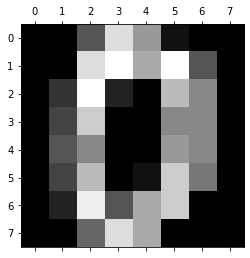

In [3]:
plt.gray()
plt.figure(figsize=(10,10))
plt.matshow(digits.images[0])

2. Do dimensionality reduction with NCA neighbourhood components analysis and standard scalar.
     1. Hint, use the following link
    https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html#sphx-glr-auto-examples-neighbors-plot-nca-dim-reduction-py
     2. Make the model

In [11]:
data, target = load_digits(return_X_y=True)
#NCA
#Pipeline, Do this, then that, then this.
model = make_pipeline(
    StandardScaler(), 
    NeighborhoodComponentsAnalysis(n_components=2, 
    random_state=0))

     2.C Train the model

In [12]:
model.fit(data, target)
# model.transform converts the 64 dimensions of the dataset, down to 2 dimensions.
# The n_components of the "NeighborhoodComponentsAnalysis" is what dimensions the transform converts the dimensions to.
data_embedded = model.transform(data)

     2.D Check accuracy of the data dimensionality reduction, using KNN

In [13]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=1)

# Use a nearest neighbor classifier to evaluate the methods
# Majority voting system - n_neighbors=K of the closest. e.g. (Dog, Cat, Lion, Girafe, Dog) <- Most dogs, therfore it must be a dog.
knn = KNeighborsClassifier(n_neighbors=5)

# Fit a nearest neighbor classifier on the embedded training set
knn.fit(model.transform(X_train), y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(model.transform(X_test), y_test)

print(acc_knn)

0.8422222222222222


    2.E Show the scatterplot

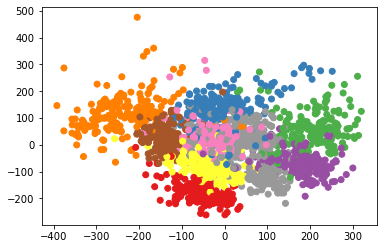

In [19]:
plt.figure()
x = data_embedded[:,0] # All rows for column 1 - AKA X axis
y = data_embedded[:, 1] # All rows for column 2 - AKA Y axis
# cmap = "Set1" <= Color map, colors the plot.
plt.scatter(x, y, c=target, cmap='Set1')

3. Use MeanShift with Bandwith=80 and fit it with the reduced dimensionality data from exercise 2.

In [21]:
analyzer = MeanShift(bandwidth=80) 
analyzer.fit(data_embedded)

MeanShift(bandwidth=80, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

    3.A Use numpy to print all the unique cluster labels_
     
 Note that we have the same amount of labels, as we did clusters in different collors from the previous task

In [25]:
# There is the same amount of clusters as the diagram above shows
clusters = analyzer.labels_
print(np.unique(clusters))

[0 1 2 3 4 5 6 7 8]


     3.B Scatter plot meanshift output, including the cluster centers

Text(0.5, 1.0, 'Estimated number of clusters: 9')

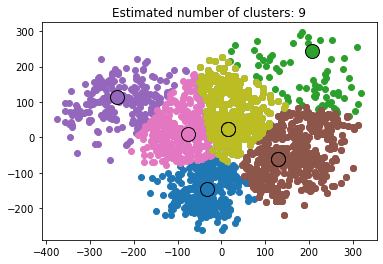

In [30]:
color = ["green","red", "orange", "pink", "cyan", "blue", "yellow", "purple"]
for value, color in zip(clusters, colors):
    picture = clusters == value
    center_cluster = analyzer.cluster_centers_[value]
    plt.scatter(data_embedded[picture, 0], data_embedded[picture, 1], c=color)
    plt.plot(center_cluster[0], center_cluster[1], 'o', markerfacecolor=color,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % len(analyzer.cluster_centers_))